In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns

['job_skills.csv']


In [2]:
data_df = pd.read_csv('../input/job_skills.csv')
data_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [3]:
data_df.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1250,1250,1250,1250,1235,1236,1236
unique,2,794,23,92,801,807,821
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Currently enrolled in a Bachelor's or Master's...,"Previous internship experience in Sales, Adver..."
freq,1227,35,168,190,33,32,32


In [4]:
data_df.isnull().sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

In [5]:
data_df.dropna(inplace=True)

In [6]:
data_df.isnull().sum()

Company                     0
Title                       0
Category                    0
Location                    0
Responsibilities            0
Minimum Qualifications      0
Preferred Qualifications    0
dtype: int64

In [12]:
data_df['country'] = data_df['Location'].apply(lambda x:x.split(',')[-1])
data_df['country'] = data_df['country'].apply(lambda y:y.replace(' ',''))
data_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,country
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,UnitedStates
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",UnitedStates
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,UnitedStates


In [54]:
data_df.Title.value_counts()[:10]

Business Intern 2018                          35
MBA Intern, Summer 2018                       34
MBA Intern 2018                               28
BOLD Intern, Summer 2018                      21
Field Sales Representative, Google Cloud      17
Interaction Designer                          12
User Experience Researcher                     9
User Experience Design Intern, Summer 2018     7
Partner Sales Engineer, Google Cloud           7
Recruiter                                      7
Name: Title, dtype: int64

In [14]:
data_df.country.value_counts()[:10]

UnitedStates     624
Ireland           87
UnitedKingdom     62
Germany           53
Singapore         41
China             38
Australia         35
Japan             31
Taiwan            30
India             28
Name: country, dtype: int64

In [17]:
top10country = data_df.country.value_counts()[:10].index.tolist()
top10country

['UnitedStates',
 'Ireland',
 'UnitedKingdom',
 'Germany',
 'Singapore',
 'China',
 'Australia',
 'Japan',
 'Taiwan',
 'India']

In [33]:
top10country_df = data_df.loc[data_df['country'].isin(top10country)]
top10country_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,country
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,UnitedStates
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",UnitedStates
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,UnitedStates


In [45]:
top10country_title = top10country_df.Title.value_counts()[:10].index.tolist()
top10country_title_df = top10country_df.loc[top10country_df['Title'].isin(top10country_title)]
top10country_title_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,country
11,Google,Partner Onboarding Manager (Americas),Partnerships,"Seattle, WA, United States",Serve as point of contact for Partners and man...,Bachelor's degree or equivalent practical expe...,Master's degree in technical field (Computer S...,UnitedStates
56,Google,Partner Onboarding Manager (Americas),Partnerships,"Sunnyvale, CA, United States",Serve as point of contact for Partners and man...,Bachelor's degree or equivalent practical expe...,Master's degree in technical field (Computer S...,UnitedStates
218,Google,Partner Onboarding Manager (Americas),Partnerships,"New York, NY, United States",Serve as point of contact for Partners and man...,Bachelor's degree or equivalent practical expe...,Master's degree in technical field (Computer S...,UnitedStates
305,Google,Partner Onboarding Manager (Americas),Partnerships,"Seattle, WA, United States",Serve as point of contact for Partners and man...,Bachelor's degree or equivalent practical expe...,Master's degree in technical field (Computer S...,UnitedStates
315,Google,"Field Sales Representative, Google Cloud",Sales & Account Management,"Minneapolis, MN, United States",Build and maintain executive relationships wit...,BA/BS degree or equivalent practical experienc...,10 years of experience selling IaaS or PaaS wi...,UnitedStates


In [46]:
country_title = top10country_title_df.pivot_table(index=['country'], columns=['Title'], values=['Company'], aggfunc='count')
country_title

Company            ...                                       
Title         BOLD Intern, Summer 2018            ...             User Experience Researcher
country                                           ...                                       
China                              NaN            ...                                    NaN
Germany                            NaN            ...                                    NaN
India                              NaN            ...                                    NaN
Ireland                            NaN            ...                                    NaN
Singapore                          NaN            ...                                    NaN
Taiwan                             NaN            ...                                    NaN
UnitedKingdom                      NaN            ...                                    NaN
UnitedStates                      21.0            ...                                    9.0

[8 rows x 10 columns]

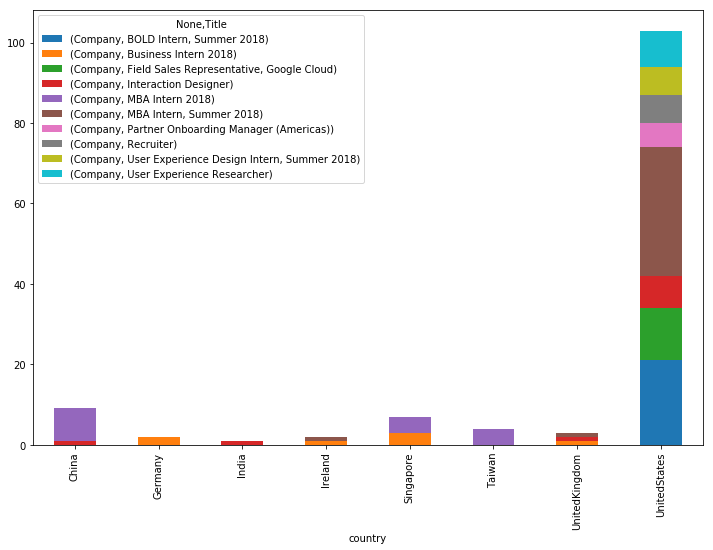

In [51]:
country_title.plot(kind='bar', stacked=True, figsize=(12,8))

In [ ]:
need to plot by single country to find the top10 title

In [57]:
def country_title(country):
    country_df = data_df[data_df['country']==country]
    title = country_df['Title'].value_counts()[:10]
    title.plot(kind='bar')
    plt.title('{} top 10 titles'.format(country))
    plt.show()

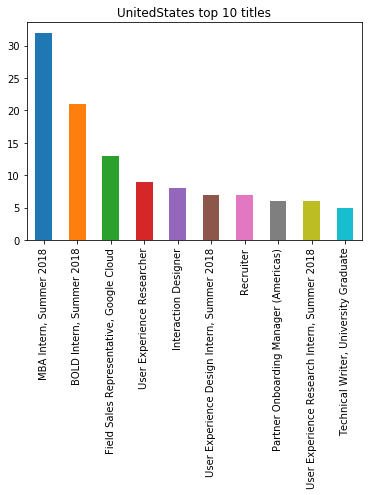

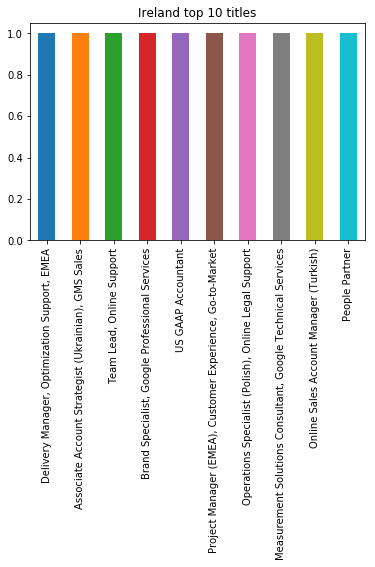

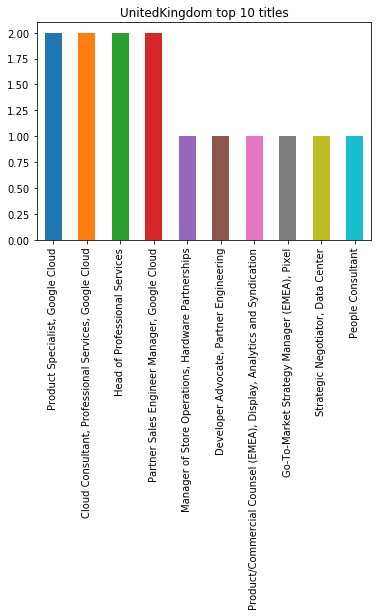

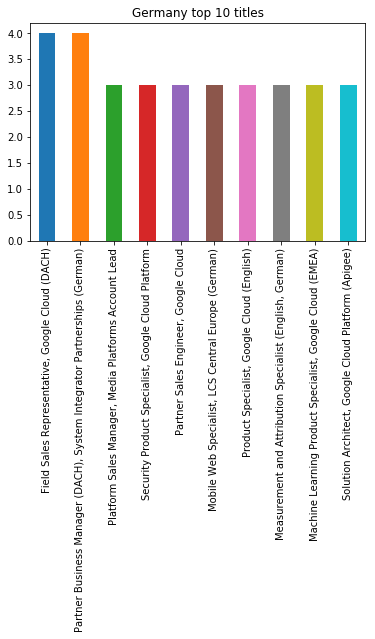

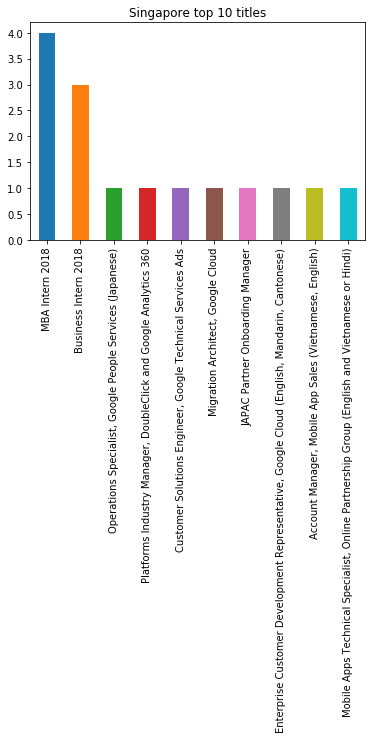

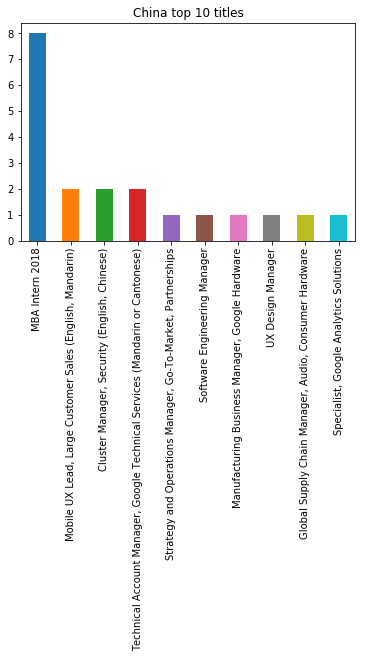

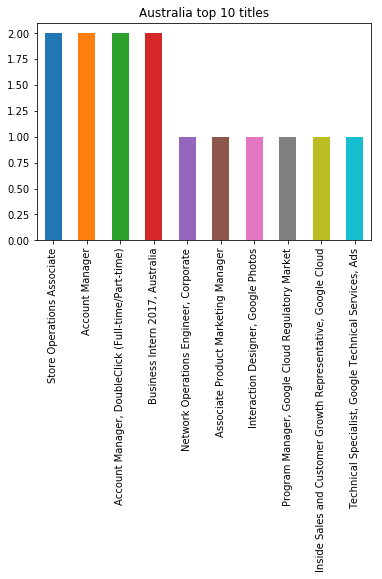

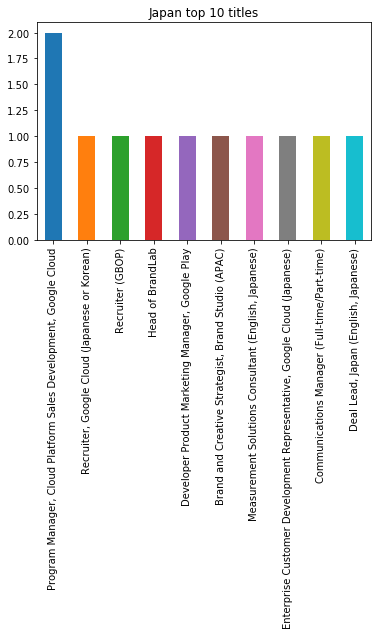

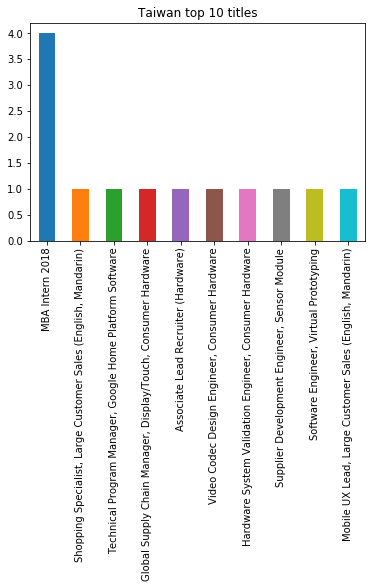

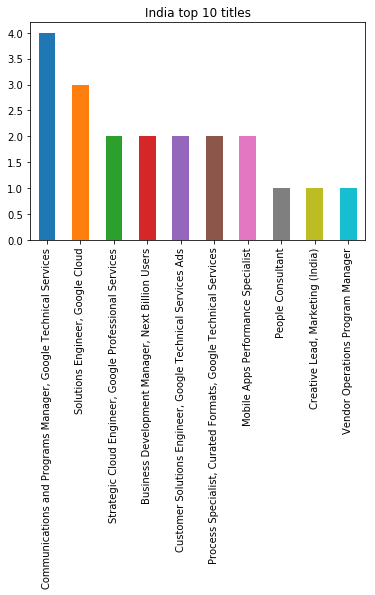

In [58]:
for i in top10country:
    country_title(i)

taiwan -> china

In [75]:
new_df = data_df.copy()
new_df

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,country
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,UnitedStates
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",UnitedStates
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,UnitedStates
5,Google,"Associate Account Strategist (Czech/Slovak), G...",Technical Solutions,"Dublin, Ireland",Communicate with customers via phone and email...,Bachelor's degree or equivalent practical expe...,"Experience in sales, customer service, account...",Ireland
6,Google,"Supplier Development Engineer, Camera, Consume...",Hardware Engineering,"Mountain View, CA, United States",Manage cross-functional activities in the supp...,BS degree in Engineering or equivalent practic...,Master's degree.\nExperience in the developmen...,UnitedStates
7,Google,"Strategic Technology Partner Manager, Healthca...",Partnerships,"Sunnyvale, CA, United States",Lead the development and strategy with partner...,BA/BS degree or equivalent practical experienc...,"BA/BS degree in a technical, life sciences or ...",UnitedStates
8,Google,"Manufacturing Business Manager, Google Hardware",Manufacturing & Supply Chain,"Xinyi District, Taiwan",Develop CM/ODM strategy and implement supplier...,"BA/BS degree in Engineering, Supply Chain or e...",MBA degree.\nExperience in procurement and sup...,Taiwan
9,Google,"Solutions Architect, Healthcare and Life Scien...",Technical Solutions,"New York, NY, United States",Help compile customer requirements as well as ...,"BA/BS degree in Computer Science, related Soft...","Master's degree in Computer Science, related E...",UnitedStates


In [76]:
# new_df.loc[new_df.country=='Taiwan', 'country'] = 'China'
new_df['country'] = new_df['country'].apply(lambda x:'China' if x == 'Taiwan' else x)

In [77]:
new_df.country.value_counts()[:10]

UnitedStates     624
Ireland           87
China             68
UnitedKingdom     62
Germany           53
Singapore         41
Australia         35
Japan             31
India             28
Switzerland       22
Name: country, dtype: int64